# Датасет
Для решения задач используйте датасет, который мы создавали в теме «4.5. K-means. Практика»:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

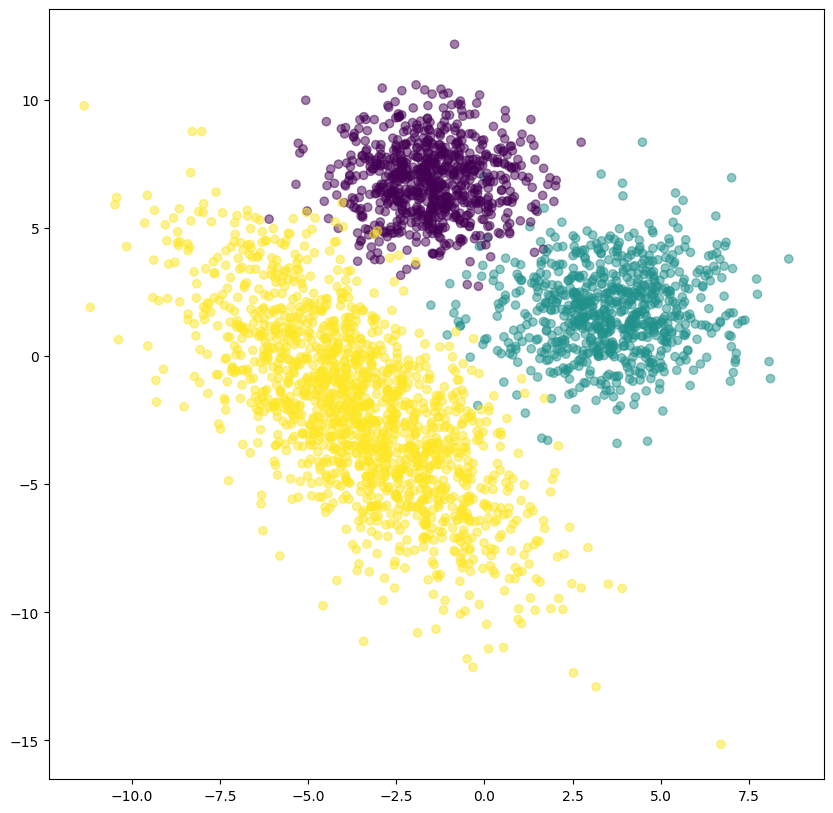

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Объект, который выполняет агломеративную кластеризацию датасета, инициализируется следующим образом:

In [19]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)

В отличие от K-means, AgglomerativeClustering не имеет параметра random_state.

Полный список параметров доступен в документации (англ.).

Обучение модели AgglomerativeClustering проходит аналогично обучению модели K-means:

In [22]:
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [32]:
y_labels = ac.labels_
y_pred = ac.fit_predict(X)
y_leaves = ac.n_leaves_

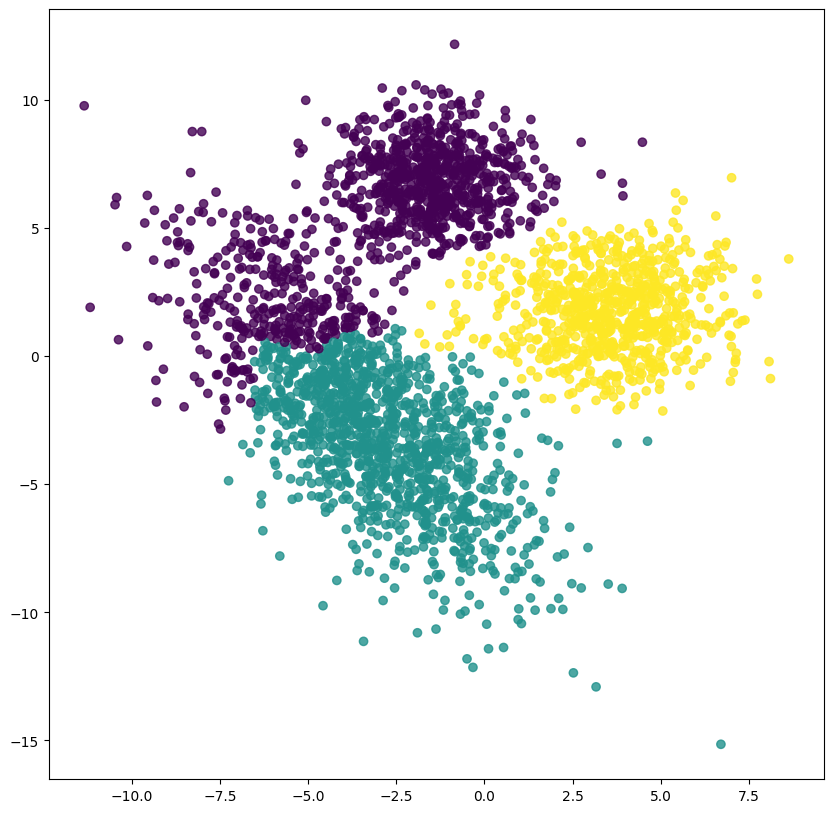

In [27]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
plt.show()

In [33]:
y_leaves

3000

In [34]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2], dtype=int64), array([1112, 1142,  746], dtype=int64))

При создании модели AgglomerativeClustering можно указать матрицу смежности, передав её в параметр connectivity. Построить матрицу смежности можно с помощью следующего кода:

from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False) </br>
connectivity = 0.5 * (connectivity + connectivity.T)

В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель AgglomerativeClustering с параметром n_clusters=3 и составленной матрицей смежности на признаках исходного датасета. Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Подсказка: При решении данной задачи стандартизация должна быть выключена.

(array([0, 1, 2], dtype=int64), array([1486,  746,  768], dtype=int64))


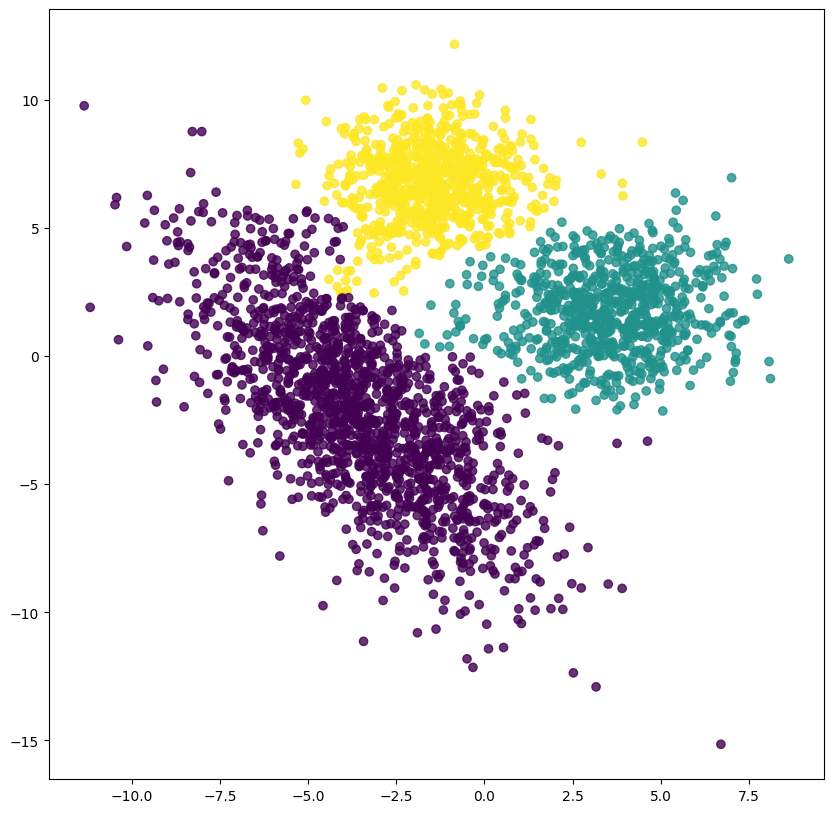

In [42]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)



ac.fit(X)

y_labels = ac.labels_
y_pred = ac.fit_predict(X)
y_leaves = ac.n_leaves_

print(np.unique(y_pred, return_counts=True))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
plt.show()


Постройте дендрограмму с помощью пакета scipy:

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

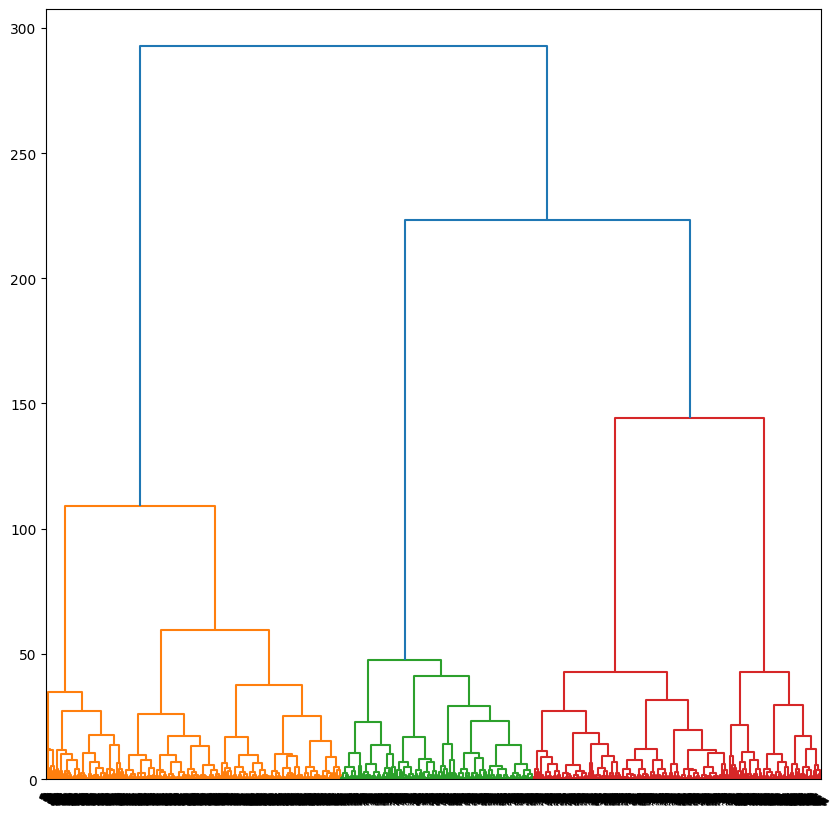

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=150.)